<a href="https://colab.research.google.com/github/gauthamarcot/nasa_gw_as/blob/main/inferometer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/My Drive/Nasa/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


import matplotlib.image as img
import matplotlib.pyplot as plt



Streaming output truncated to the last 5000 lines.
/content/drive/My Drive/Nasa/data/validation/validation/Light_Modulation/H1_jwKDSvAsmq_spectrogram_2.0.png
/content/drive/My Drive/Nasa/data/validation/validation/Light_Modulation/H1_A9OpGH7TK3_spectrogram_2.0.png
/content/drive/My Drive/Nasa/data/validation/validation/Light_Modulation/H1_0IWvYmObfv_spectrogram_1.0.png
/content/drive/My Drive/Nasa/data/validation/validation/Light_Modulation/H1_2dVTt0Mzgz_spectrogram_1.0.png
/content/drive/My Drive/Nasa/data/validation/validation/Light_Modulation/H1_XPP9L2UmPZ_spectrogram_2.0.png
/content/drive/My Drive/Nasa/data/validation/validation/Light_Modulation/H1_UTgYvGx9yp_spectrogram_0.5.png
/content/drive/My Drive/Nasa/data/validation/validation/Light_Modulation/H1_WDTzJ0DxC3_spectrogram_0.5.png
/content/drive/My Drive/Nasa/data/validation/validation/Light_Modulation/H1_OyYfPPzeTq_spectrogram_1.0.png
/content/drive/My Drive/Nasa/data/validation/validation/Light_Modulation/H1_WxXiS6QnjN_spectr

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(479, 569, 4)


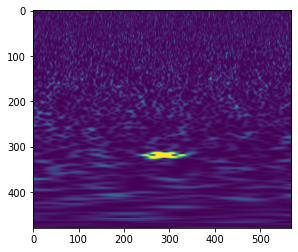

In [17]:
sample = img.imread('/content/drive/My Drive/Nasa/data/train/train/Power_Line/H1_9wlnDo4Vtg_spectrogram_4.0.png')

plt.imshow(sample)
print(sample.shape)


In [18]:
from keras_preprocessing.image import ImageDataGenerator


In [21]:
TRAINING_DIR = '/content/drive/My Drive/Nasa/data/train/train/'
training_datagen = ImageDataGenerator(rescale = 1./255)

VALIDATION_DIR = '/content/drive/My Drive/Nasa/data/validation/validation/'
validation_datagen = ImageDataGenerator(rescale = 1./255)

sample.shape[0]

479

In [22]:
train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(sample.shape[0],sample.shape[1]),
    batch_size = 32,
	class_mode='categorical',
  shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(sample.shape[0],sample.shape[1]),
    batch_size = 32,
	class_mode='categorical',
  shuffle=True
)

train_generator.class_indices


Found 22348 images belonging to 22 classes.
Found 4800 images belonging to 22 classes.


{'1080Lines': 0,
 '1400Ripples': 1,
 'Air_Compressor': 2,
 'Blip': 3,
 'Chirp': 4,
 'Extremely_Loud': 5,
 'Helix': 6,
 'Koi_Fish': 7,
 'Light_Modulation': 8,
 'Low_Frequency_Burst': 9,
 'Low_Frequency_Lines': 10,
 'No_Glitch': 11,
 'None_of_the_Above': 12,
 'Paired_Doves': 13,
 'Power_Line': 14,
 'Repeating_Blips': 15,
 'Scattered_Light': 16,
 'Scratchy': 17,
 'Tomte': 18,
 'Violin_Mode': 19,
 'Wandering_Line': 20,
 'Whistle': 21}

In [23]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image

model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(sample.shape[0],sample.shape[1],3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(22, activation='softmax')
])

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 477, 567, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 238, 283, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 236, 281, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 118, 140, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 116, 138, 128)     73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 58, 69, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 67, 128)       1

In [ ]:
callbacks = tf.keras.callbacks.EarlyStopping(patience=2)

history = model.fit_generator(train_generator, epochs=50, 
                              validation_data = validation_generator, validation_steps = 32,
                              verbose = 1, steps_per_epoch = 32, callbacks=[callbacks])


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
32/32 [==============================] - 1429s 45s/step - loss: 3.7121 - accuracy: 0.4805 - val_loss: 1.3885 - val_accuracy: 0.6035
Epoch 2/50
32/32 [==============================] - 1231s 38s/step - loss: 1.0800 - accuracy: 0.7246 - val_loss: 0.8941 - val_accuracy: 0.7227
Epoch 3/50
 4/32 [==>...........................] - ETA: 9:27 - loss: 0.7537 - accuracy: 0.8359

In [ ]:
plt.grid()

plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = 'Val')
plt.title('Accuracy')
plt.legend()
plt.show()

plt.grid()
plt.figure()
plt.plot(history.history['loss'], label = 'Train')
plt.plot(history.history['val_loss'], label = 'Val')
plt.title('Loss')
plt.legend()

In [ ]:
TEST_DIR = 'datasets/test/test/'
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
	TEST_DIR,
	target_size=(sample.shape[0],sample.shape[1]),
    batch_size = 1,
	class_mode='categorical',
  shuffle=False
)

In [ ]:
prediction = model.predict_generator(test_generator, steps = 4720 , verbose = 1)
